In [1]:
%pylab inline

pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Moire_TBG_phonons/BM_bandstructure"
pathchow='/home/jfm343/Documents/Moire_phonon/BM_bandstructure'
pathpc='/home/juan/Documents/Projects/BM_bandstructure'

pathy=pathchow

import numpy as np
import pandas as pd
import os
sys.path.insert(0, pathy+'/Mods')
import Dispersion
import MoireLattice
from scipy import linalg as la
import seaborn as sns


rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size'   : 14})
rc('text', usetex=True)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
Nsamp=30
modulation_theta=1.05
modulation_kappa=0.5
mode='T'
print("\n \n")
print("lattice sampling...") 

#Lattice parameters 
#lattices with different normalizations
theta=modulation_theta*np.pi/180  # magic angle
c6sym=True
umkl=0 #the number of umklaps where we calculate an observable ie Pi(q), for momentum transfers we need umkl+1 umklapps when scattering from the 1bz
l=MoireLattice.MoireTriangLattice(Nsamp,theta,0,c6sym,umkl)
lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2,c6sym,umkl) #this one
[q1,q2,q3]=l.q
q=np.sqrt(q1@q1)
print(f"taking {umkl} umklapps")
VV=lq.boundary()
#kosh params realistic  -- this is the closest to the actual Band Struct used in the paper
# hbvf = 2.1354; # eV
# hvkd=hbvf*q
# kappa_p=0.0797/0.0975
# kappa=kappa_p
# up = 0.0975; # eV
# u = kappa*up; # eV
# alpha=up/hvkd
# alph=alpha
PH=True

#JY params 
hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
hvkd=hbvf*q
kappa=modulation_kappa
up = 0.105; # eV
u = kappa*up; # eV
alpha=up/hvkd
alph=alpha
#Andrei params 
# hbvf = 19.81/(8*np.pi/3); # eV
# hvkd=hbvf*q
# kappa=1
# up = 0.110; # eV
# u = kappa*up; # eV
# alpha=up/hvkd
# alph=alpha
print("\n \n")
print("parameters of the hamiltonian...")
print("hbvf is ..",hbvf )
print("q is...", q)
print("hvkd is...", hvkd)
print("kappa is..", kappa)
print("alpha is..", alph)
print("the twist angle is ..", theta)
print("\n \n")
#electron parameters
nbands=2
nremote_bands=0
hbarc=0.1973269804*1e-6 #ev*m
alpha=137.0359895 #fine structure constant
a_graphene=2.458*(1e-10) #in meters this is the lattice constant NOT the carbon-carbon distance
e_el=1.6021766*(10**(-19))  #in joule/ev
ee2=(hbarc/a_graphene)/alpha
eps_inv = 1/10
d_screening=20*(1e-9)/a_graphene
d_screening_norm=d_screening*lq.qnor()
epsilon_0 = 8.85*1e-12
ev_conv = e_el
Vcoul=( e_el*e_el*eps_inv*d_screening/(2*epsilon_0*a_graphene) )
V0= (  Vcoul/lq.Vol_WZ() )/ev_conv
print(V0, 'la energia de coulomb en ev')
print("\n \n")
#phonon parameters
c_light=299792458 #m/s
M=1.99264687992e-26 * (c_light*c_light/e_el) # [in units of eV]
mass=M/(c_light**2) # in ev *s^2/m^2
alpha_ep=0 # in ev
beta_ep=4 #in ev SHOULD ALWAYS BE GREATER THAN ZERO
if mode=="L":
    c_phonon=21400 #m/s
if mode=="T":
    c_phonon=13600 #m/s
else:
    c_phonon=21400 #m/s

#calculating effective coupling
A1mbz=lq.VolMBZ*((q**2)/(a_graphene**2))
AWZ_graphene=np.sqrt(3)*a_graphene*a_graphene/2
A1bz=(2*np.pi)**2 / AWZ_graphene
alpha_ep_effective=np.sqrt(1/2)*np.sqrt(A1mbz/A1bz)*alpha_ep #sqrt 1/2 from 2 atoms per unit cell in graphene
beta_ep_effective=np.sqrt(1/2)*np.sqrt(A1mbz/A1bz)*beta_ep #sqrt 1/2 from 2 atoms per unit cell in graphene
alpha_ep_effective_tilde=alpha_ep_effective/beta_ep_effective
beta_ep_effective_tilde=beta_ep_effective/beta_ep_effective

#testing the orders of magnitude for the dimensionless velocity squared
qq=q/a_graphene
Wupsilon=(beta_ep_effective**2)*qq*qq
W=0.008
#ctilde=W*(qq**2)*(mass)*(c_phonon**2)/Wupsilon
print("phonon params", Wupsilon )
print("phonon params upsilon", Wupsilon/W )
print("area ratio", A1mbz/A1bz, (2*np.sin(theta/2))**2   )
print("correct factor by which the interaction is reduced",np.sqrt(2)/(2*np.sin(theta/2)))
print("c tilde",np.sqrt((Wupsilon/W)*(1/(qq**2))*(1/mass) ))
print("\n \n")
    
#parameters to be passed to the Bubble class
mode_layer_symmetry="a" #whether we are looking at the symmetric or the antisymmetric mode
cons=[alpha_ep_effective_tilde,beta_ep_effective_tilde, Wupsilon, a_graphene, mass] #constants used in the bubble calculation and data anlysis

#rescaling coupling constant
rf=1.75
gp2=(rf)**2
print(beta_ep*rf) #rescaling so that the coupling is given by
    


 

lattice sampling...
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.03545188903808594  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice points
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.03306412696838379  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice points
taking 0 umklapps

 

parameters of the hamiltonian...
hbvf is .. 2.3382685902179845
q is... 0.07676251561000431
hvkd is... 0.17949137915699082
kappa is.. 0.5
alpha is.. 0.5849863123964439
the twist angle is .. 0.01832595714594046

 

0.11619672932818317 la energia de coulomb en ev

 

phonon params 262026856138636.84
phonon params upsilon 3.2753357017329604e+16
area ratio 0.0003358313063384534 0.0003358313063384533
correct factor by which the interaction is reduced 77.17104983428196
c tilde 1643.2385314028643

 

## For $\kappa$= 0.3

In [3]:
kappa=0.3
# path=pathy+'/data/thetasweep_k07_noHF_2022-07-04-20-26-39'
path=pathy+'/data/thetasweep_k03_2_2022-07-06-02-31-43'
subpaths=os.listdir(path)
print(subpaths)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))

def getdatadir(fulpath,mode):
    data=[]
    for pa in fulpath:
        if ('data' in pa) and (mode in pa): data.append(pa)
    return data
        
thet=[]
renorm=[]
renorm2=[]
frames=[]
tdos=[]
thetass=[]
eners=[]
fils=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2, 'mode_T_')
    fullpath=fulpath+'/'+data[0]
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)

    

    Nsamp=30
    theta=dff['theta'][0]
    c6sym=True
    umkl=0 #the number of umklaps where we calculate an observable ie Pi(q), for momentum transfers we need umkl+1 umklapps when scattering from the 1bz
    l=MoireLattice.MoireTriangLattice(Nsamp,theta,0,c6sym,umkl)
    lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2,c6sym,umkl) #this one
    [q1,q2,q3]=l.q
    q=la.norm(q1)
    
    #JY params 
    hbvf = (3/(2*np.sqrt(3)))*2.7; # eV
    hvkd=hbvf*q
    up = 0.105; # eV
    u = kappa*up; # eV
    alpha=up/hvkd
    alph=alpha
    PH=True
    nbands=2

    # print("Loading  ..........")
    with open(fulpath+'/dispersions/Edisp_'+str(lq.Npoints)+'_theta_'+str(lq.theta)+'_kappa_'+str(kappa)+'.npy', 'rb') as f:
        Ene_valley_plus_dos=np.load(f)
    with open(fulpath+'/dispersions/Edism_'+str(lq.Npoints)+'_theta_'+str(lq.theta)+'_kappa_'+str(kappa)+'.npy', 'rb') as f:
        Ene_valley_min_dos=np.load(f)

    hpl=Dispersion.Ham_BM(hvkd, alph, 1, lq, kappa, PH, 1) #last argument is whether or not we have interlayer hopping
    hmin=Dispersion.Ham_BM(hvkd, alph, -1, lq, kappa, PH, 1 ) #last argument is whether or not we have interlayer hopping

    Ndos=30
    ldos=MoireLattice.MoireTriangLattice(Ndos,theta,2,c6sym,umkl)
    disp=Dispersion.Dispersion( ldos, nbands, hpl, hmin)
    [earr, dos, f2 ]=disp.DOS(Ene_valley_plus_dos,Ene_valley_min_dos)


    NN=2000
    mine=earr[1]
    maxe=earr[-2]
    mus=np.linspace(mine,maxe, NN)
    dosarr=f2(mus)
    de=mus[1]-mus[0]

    #FILLING FOR EACH CHEMICAL POTENTIAL
    ndens=[]
    for mu_ind in range(NN):
        N=np.trapz(dosarr[0:mu_ind])*de
        ndens.append(N)
            
    nn=np.array(ndens)
    nn=8*(nn/nn[-1])  - 4

    tdos.append(dosarr)
    thetass.append(theta)
    eners.append(mus)
    fils.append(nn)
    #
df=pd.concat(frames).sort_values(['theta', 'nu'])

thetass,tdos,eners,fils = zip(*sorted(zip(thetass,tdos,eners,fils)))


['thetasweep_k05_2_1.07', 'thetasweep_k05_2_1.01', 'thetasweep_k05_2_1.02', 'thetasweep_k05_2_1.05', 'thetasweep_k05_2_1.06', 'thetasweep_k05_2_1.04', 'inforun', 'thetasweep_k05_2_1.03']
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.03391742706298828  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice points
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.03319597244262695  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice points
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.05345463752746582  s
919 1bz numer of sampling lattice points
919 X numer of sampling lattice points
6433 Q numer of sampling lattice points
number of bands in density of states calculation, 2
sum of the hist, normed? 8.000000000000039
starting sampling in reciprocal

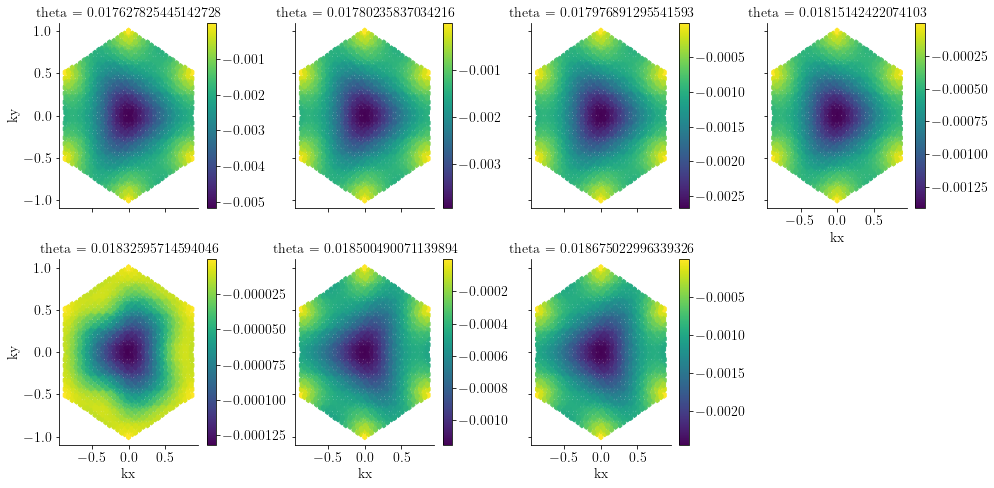

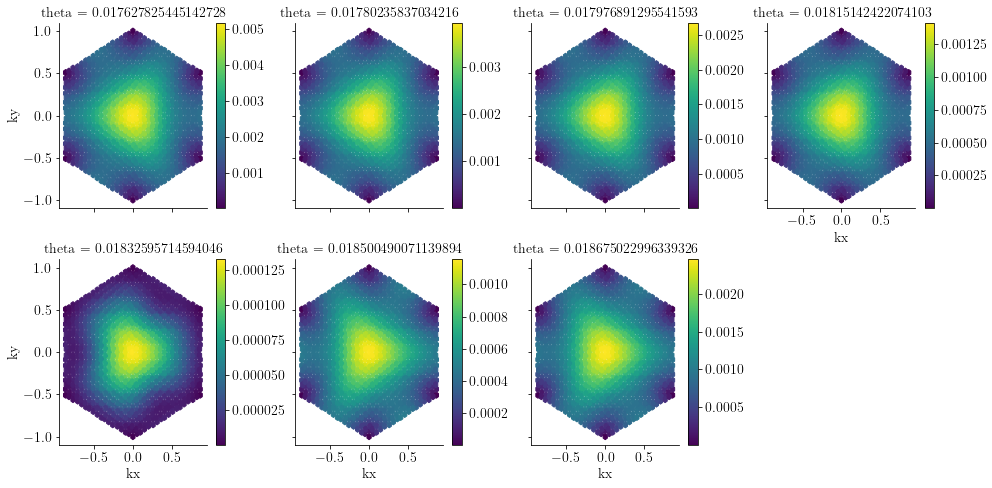

In [4]:
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'Ep1', cbar=False, square = True)
# get figure background color


# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'Ep2', cbar=False, square = True)
# get figure background color




starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.027988910675048828  s
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.02806830406188965  s
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.027983903884887695  s
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.027704477310180664  s
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.027943134307861328  s
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.027980804443359375  s
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.0278472900390625  s


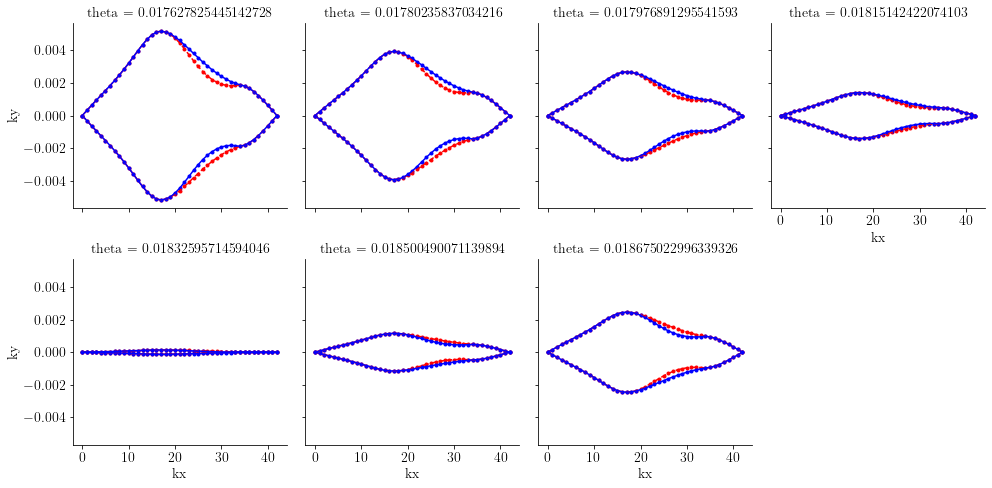

In [5]:
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[df['nu'] == 0.0]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    d4 = np.array(data.loc[:,args[3]])
    d5 = np.array(data.loc[:,args[4]])
    d6 = np.array(data.loc[:,args[5]])
    
    [path,kpath,HSP_index]=lq.embedded_High_symmetry_path(d1,d2)
    pth=np.arange(np.size(path))
    plt.plot(d5[path], ls='--', c='r')
    plt.plot(d6[path], ls='--', c='r')
    plt.scatter(pth,d5[path], c='r', s=9)
    plt.scatter(pth,d6[path], c='r', s=9)
    plt.plot(d3[path], c='b')
    plt.plot(d4[path], c='b')
    plt.scatter(pth,d3[path], c='b', s=9)
    plt.scatter(pth,d4[path], c='b', s=9)
    

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'Ep1','Ep2','Em1','Em2', cbar=False, square = True)
# get figure background color

starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.0344386100769043  s
[0, 17, 34, 42]


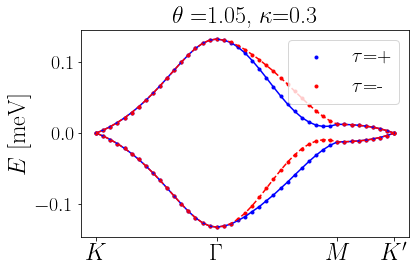

In [17]:


thetaarr=np.sort(np.array(df['theta'].unique()))
indthet=4
df_one_temp=df.loc[df['theta'] == thetaarr[indthet]]


def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])*1000
    d4 = np.array(data.loc[:,args[3]])*1000
    d5 = np.array(data.loc[:,args[4]])*1000
    d6 = np.array(data.loc[:,args[5]])*1000
    
    [path,kpath,HSP_index]=lq.embedded_High_symmetry_path(d1,d2)
    print(HSP_index)
    pth=np.arange(np.size(path))
    
    plt.plot(d3[path], c='b')
    plt.plot(d4[path], c='b')
    plt.scatter(pth,d3[path], c='b', s=9)
    plt.scatter(pth,d4[path], c='b', s=9, label=r'$\tau$=+')
    
    plt.plot(d5[path], ls='--', c='r')
    plt.plot(d6[path], ls='--', c='r')
    plt.scatter(pth,d5[path], c='r', s=9)
    plt.scatter(pth,d6[path], c='r', s=9, label=r'$\tau$=-')
    
    plt.legend(fontsize=20)
    plt.xticks(HSP_index,[r'$K$',r'$\Gamma$',r'$M$',r'$K^{\prime}$'],size=24)
    plt.yticks(size=20)
    
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)
    
    
    plt.ylabel(r'$E$ [meV]', size=24)
    plt.title(r'$\theta=$'+str(np.round(thetaarr[indthet]*180/np.pi, 2)) +r', $\kappa$='+str(kappa), size=24)
    plt.tight_layout()
    



draw_heatmap('kx', 'ky', 'Ep1','Ep2','Em1','Em2',data=df_one_temp)
plt.savefig('imgs/bandstruct_03.png', dpi=400)

In [30]:
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

[0.01762783 0.01780236 0.01797689 0.01815142 0.01832596 0.01850049
 0.01867502]
[0.         0.20526316 0.41052632 0.61578947 0.82105263 1.02631579
 1.23157895 1.43684211 1.64210526 1.84736842 2.05263158 2.25789474
 2.46315789 2.66842105 2.87368421 3.07894737 3.28421053 3.48947368
 3.69473684 3.9       ]
(140,)


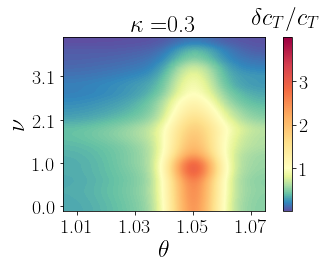

In [35]:

cTrans=13600

df_one_temp=df.loc[(df['kx'] == 0.0) & (df['ky'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    the=data.loc[:,args[0]].unique()
    print(the)
    Nth=np.size(the)
    d1 = np.array(data.loc[:,args[0]])
    nu=data.loc[:,args[1]].unique()
    print(nu)
    Nnu=np.size(nu)
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.sqrt(gp2)*np.array(data.loc[:,args[2]]) 
    print(np.shape(d1))

    plt.xticks(np.arange(Nth),np.round(the*180/np.pi,2),  size=20)
    plt.yticks(np.arange(Nnu),np.round(nu, 1),size=20)
    
    color_map = plt.cm.get_cmap('Spectral_r')
    shifted_cmap = shiftedColorMap(color_map, midpoint=0.25, name='shifted')
    im=plt.imshow(d3.reshape([Nth,Nnu]).T/cTrans, origin='lower', aspect=0.3, cmap=shifted_cmap ,  interpolation='bicubic')
    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    
    plt.xlabel(r'$\theta$', size=24)
    plt.ylabel(r'$\nu$', size=24)
    
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)
    
    plt.text(6,21,r'$\delta c_T/c_T$', size=24)
    # plt.text(7,22,r'$\frac{\delta c_T}{c_T}$', size=24)
    
    
    # plt.ylabel(r'$\nu', size=24)
    plt.title(r'$\kappa=$'+str(kappa) , size=24)
    plt.tight_layout()


# fg = sns.FacetGrid(df_one_temp, col='kappa',height=3.5, col_wrap=4, sharey=False)
# fg.map_dataframe(draw_heatmap, 'theta', 'nu', 'delt_cph','kappa', cbar=False, square = True)
# # get figure background color

draw_heatmap('theta', 'nu', 'delt_cph','kappa', data=df_one_temp)
plt.savefig('imgs/delt_03.png', dpi=400)

[0.         0.20526316 0.41052632 0.61578947 0.82105263 1.02631579
 1.23157895 1.43684211 1.64210526 1.84736842 2.05263158 2.25789474
 2.46315789 2.66842105 2.87368421 3.07894737 3.28421053 3.48947368
 3.69473684 3.9       ] 1.0263157894736843


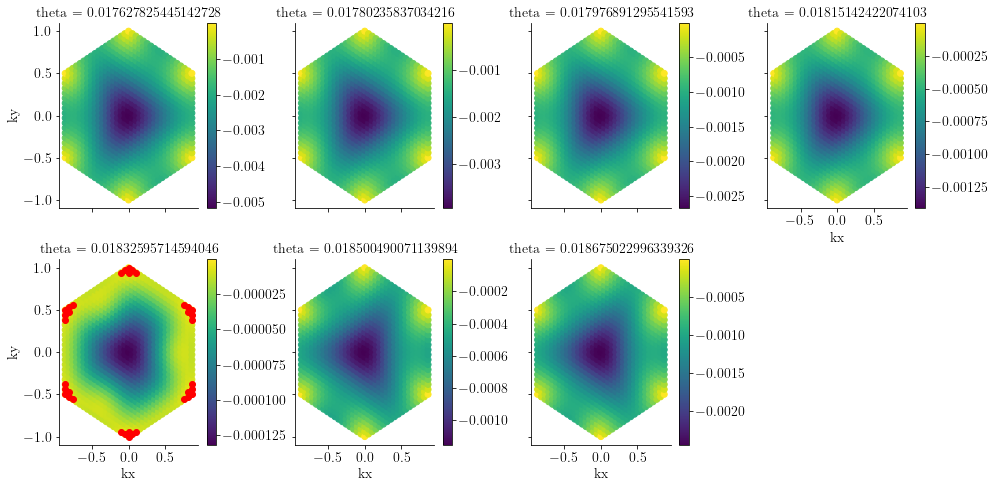

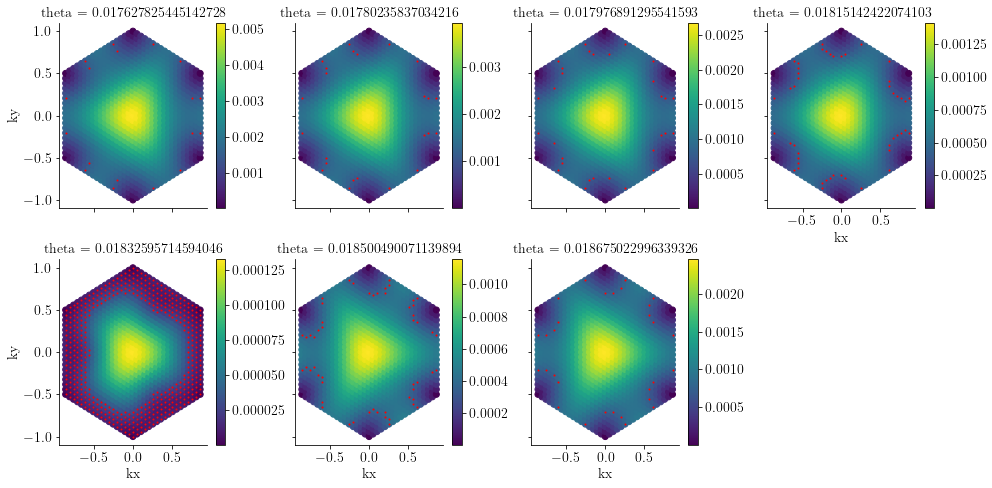

In [8]:
nu=df.loc[:,'nu'].unique()
mu=df.loc[:,'mu'].unique()
print(nu, nu[5])
# print(mu,mu[5])
indnumax=6
eps=2e-5

#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[df['nu'] == nu[indnumax]]

indnumax=5
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    d4 = np.array(data.loc[:,args[3]])
    aa=np.where(np.abs(d3 -d4[indnumax])<eps)[0]
    plt.scatter(d1,d2 ,c=d3)
    plt.colorbar()
    plt.scatter(d1[aa],d2[aa] ,c='r')
    

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'Ep1', 'mu', cbar=False, square = True)
# get figure background color


# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[df['nu'] == nu[indnumax]]
indnumax=5
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    d4 = np.array(data.loc[:,args[3]])
    aa=np.where(np.abs(d3 -d4[indnumax])<eps)[0]
    plt.scatter(d1,d2 ,c=d3)
    plt.colorbar()
    plt.scatter(d1[aa],d2[aa] ,c='r', s=1)
    
    

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'Ep2', 'mu', cbar=False, square = True)
# get figure background color

Just plotting the Fermi surfaces one notices the stark difference near magic angle for $\kappa=0.7$ where additional dirac cones appear in the middle of the $\Gamma-K$ line. The bandwidth is also dramatically lower than for nearby twist angles (Almost one order of magnitude lower than neighbouring angles). This is reflected in the Bubbles below

[0.         0.20526316 0.41052632 0.61578947 0.82105263 1.02631579
 1.23157895 1.43684211 1.64210526 1.84736842 2.05263158 2.25789474
 2.46315789 2.66842105 2.87368421 3.07894737 3.28421053 3.48947368
 3.69473684 3.9       ] 1.0263157894736843


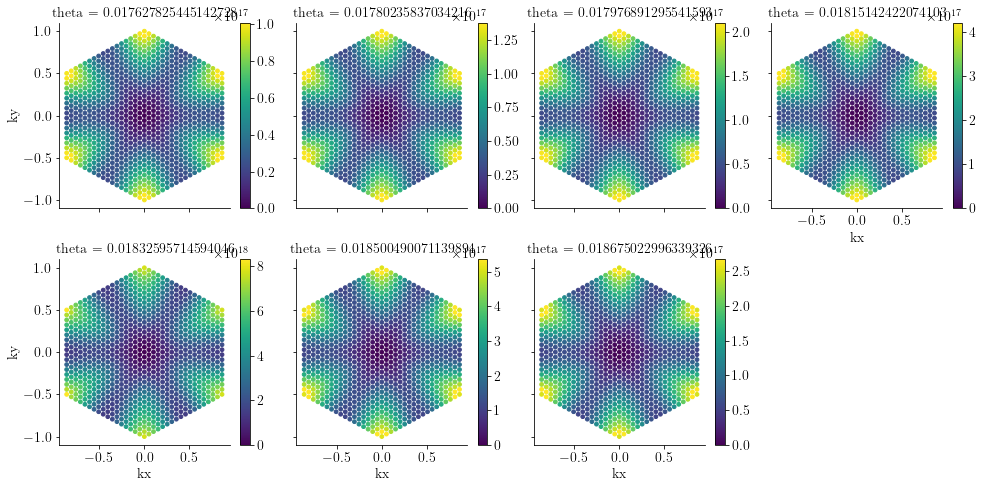

In [9]:
# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()

nu=df.loc[:,'nu'].unique()
print(nu, nu[5])
indnumax=0

df_one_temp=df.loc[df['nu'] == nu[indnumax]]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = gp2*data.loc[:,args[2]]
    plt.scatter(d1,d2 ,c=d3,s=14)
    # plt.hexbin(d1,d2 ,C=d3,sizes=2*np.ones(np.size(d1)))
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'bub', cbar=False, square = True)
# get figure background color





findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


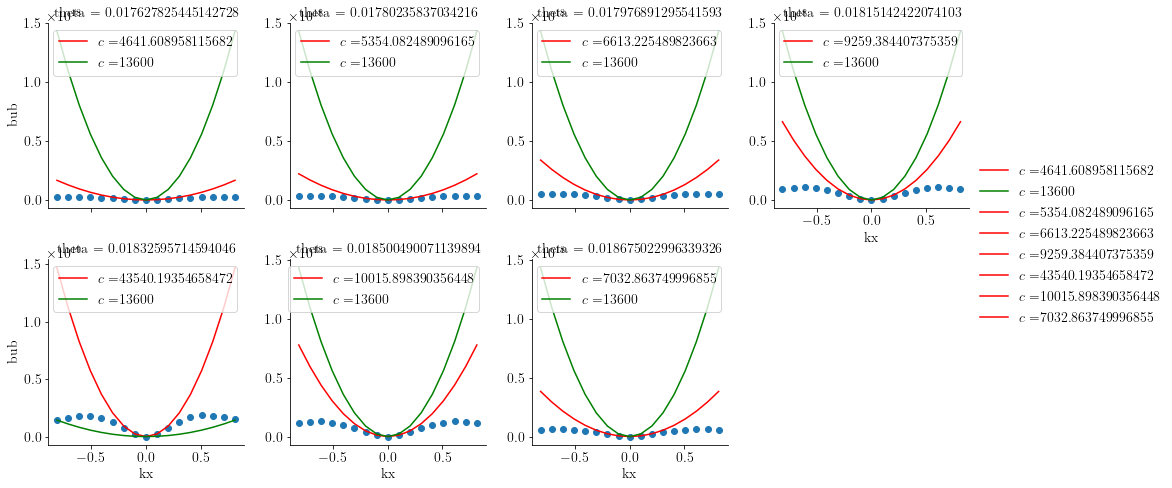

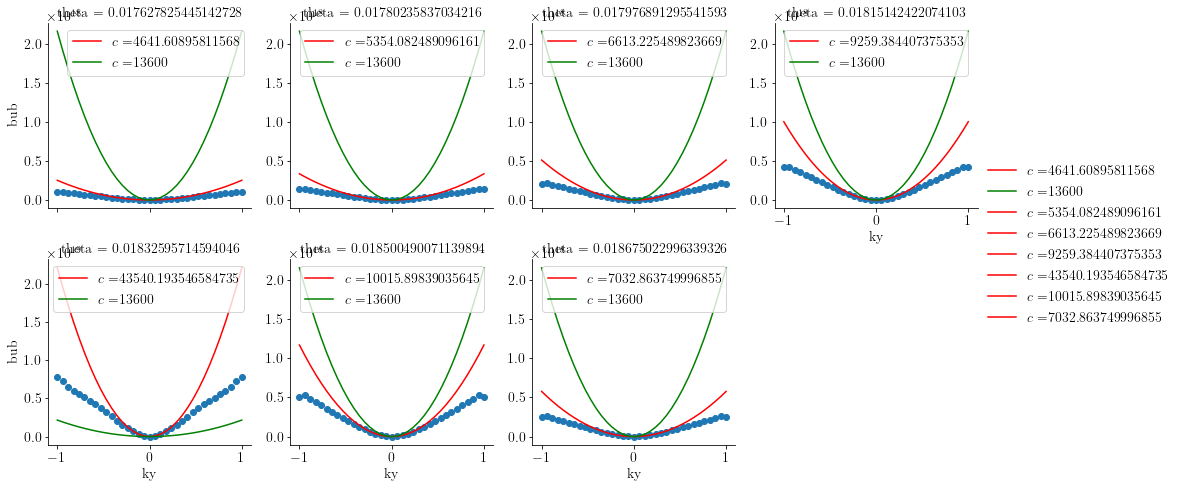

In [10]:

cTrans=13600
# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[(df['nu'] == nu[indnumax]) & (df['ky'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    th = data.loc[:,args[3]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,gp2*d2)
    plt.plot(d1, gp2*cons*d1*d1*d3*d3,c='r', label=r'$c=$'+str(np.sqrt(gp2)*d3.mean()))
    plt.plot(d1, cons*d1*d1*(cTrans**2),c='g', label=r'$c=$'+str(cTrans))
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4, sharey=False)
fg.map_dataframe(draw_heatmap, 'kx', 'bub', 'delt_cph','theta', cbar=False, square = True)
# get figure background color
fg.add_legend()
for ax in fg.axes.ravel():
    ax.legend()

df_one_temp=df.loc[(df['nu'] == nu[indnumax]) & (df['kx'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    th = data.loc[:,args[3]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,gp2*d2)
    plt.plot(d1, gp2*cons*d1*d1*d3*d3,c='r', label=r'$c=$'+str(np.sqrt(gp2)*d3.mean()))
    plt.plot(d1, cons*d1*d1*(cTrans**2),c='g', label=r'$c=$'+str(cTrans))
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4, sharey=False)
fg.map_dataframe(draw_heatmap, 'ky', 'bub', 'delt_cph','theta', cbar=False, square = True)
# get figure background color
fg.add_legend()
for ax in fg.axes.ravel():
    ax.legend()

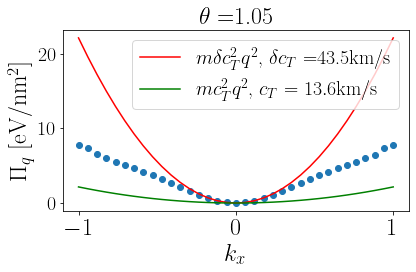

In [16]:
cTrans=13600

thetaarr=np.sort(np.array(df['theta'].unique()))
indthet=4

df_one_temp=df.loc[(df['nu'] == nu[indnumax])&(df['theta'] == thetaarr[indthet])&( (df['kx'] == 0.0))]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    th = data.loc[:,args[3]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,gp2*d2/1e+18)
    plt.plot(d1, gp2*cons*d1*d1*d3*d3/1e+18,c='r', label=r'$m\delta c_T^2 q^2$,  $\delta c_T=$'+str(np.round(np.sqrt(gp2)*d3.mean()/1000,1) )+'km/s')
    plt.plot(d1, cons*d1*d1*(cTrans**2)/1e+18,c='g', label=r'$m c_T^2 q^2$,  $c_T=13.6$km/s')
    
    plt.legend(fontsize=20)
    plt.xticks(size=24)
    plt.yticks(size=20)
    
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)
    
    
    plt.xlabel(r'$k_x$', size=24)
    plt.ylabel(r'$\Pi_q$  [eV/nm$^2$]', size=24)
    plt.title(r'$\theta=$'+str(np.round(thetaarr[indthet]*180/np.pi, 2)) , size=24)
    plt.tight_layout()
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)
draw_heatmap('ky', 'bub', 'delt_cph','theta',data=df_one_temp)
plt.savefig('imgs/c_ext_03.png', dpi=400)

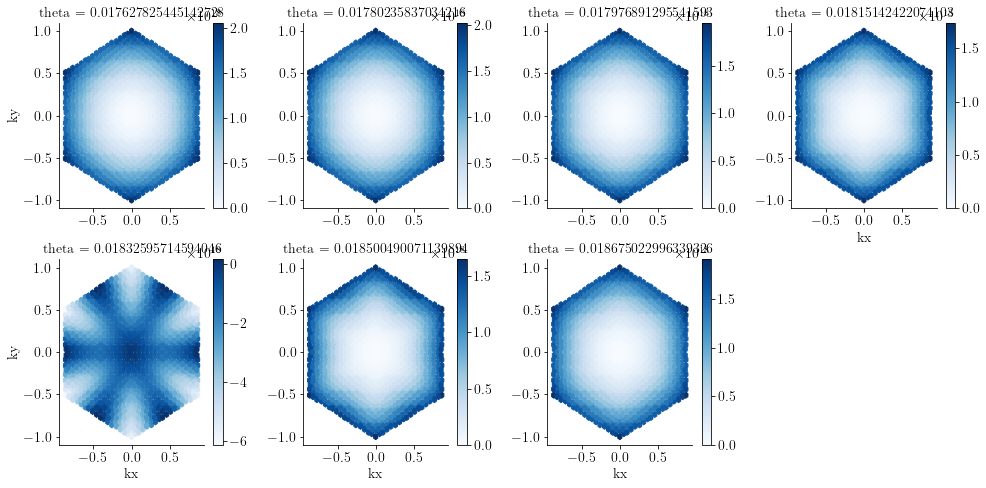

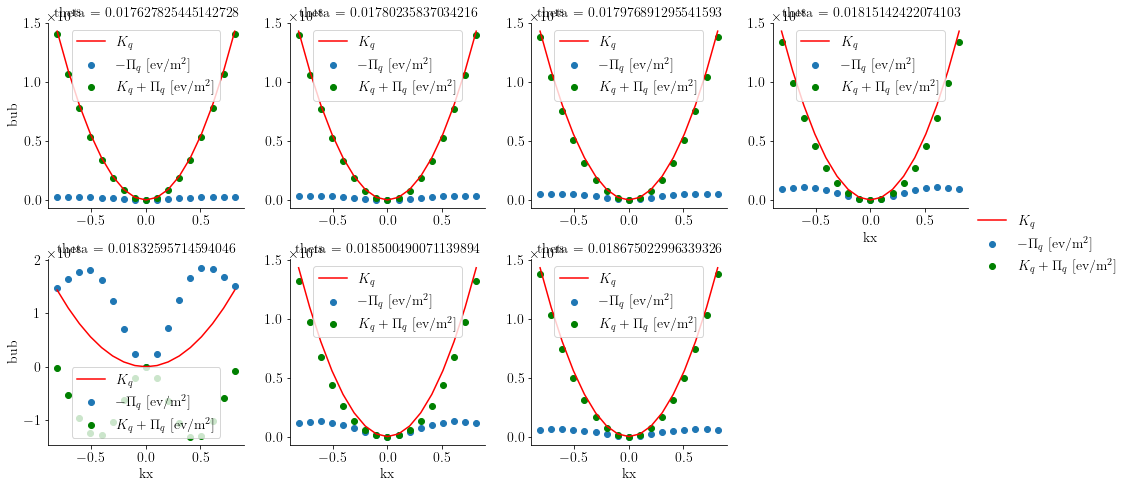

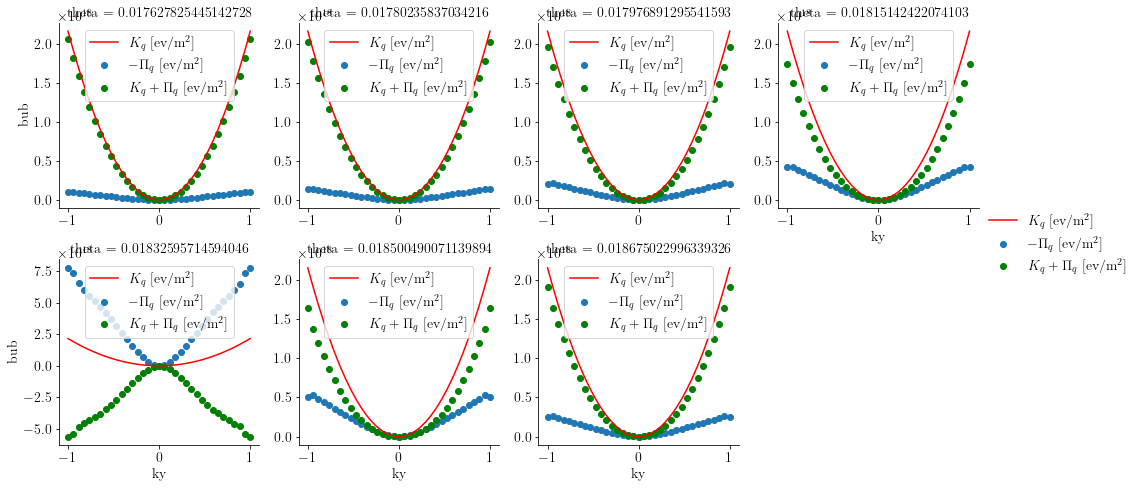

In [12]:
# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()

cTrans=13600
df_one_temp=df.loc[df['nu'] == nu[indnumax]]
def draw_heatmap(*args, **kwargs):
    
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    d3 = cons*(cTrans**2) * (d2**2 +d1**2)-gp2*data.loc[:,args[2]]
    color_map = plt.cm.get_cmap('Blues')
    plt.hexbin(d1,d2 ,C=d3,sizes=10*np.ones(np.size(d1)), cmap=color_map)
    
    plt.colorbar()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4,sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'bub', cbar=False, square = True)
# get figure background color


# # Generate a set of sample data
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()
df_one_temp=df.loc[(df['nu'] == nu[indnumax]) & (df['ky'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = gp2*data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    th = data.loc[:,args[3]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,d2,label=r'$-\Pi_q$ [ev/m$^2$]')
    # plt.plot(d1, cons*d1*d1*d3*d3)
    plt.plot(d1, cons*(cTrans**2)*d1*d1, c='r', label=r'$K_q$')
    plt.scatter(d1,cons*(cTrans**2)*d1*d1-d2,c='g',label=r'$K_q+\Pi_q$ [ev/m$^2$]')
    plt.legend()
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4, sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'kx', 'bub', 'delt_cph','theta', cbar=False, square = True)
fg.add_legend()
for ax in fg.axes.ravel():
    ax.legend()
# get figure background color


df_one_temp=df.loc[(df['nu'] == nu[indnumax]) & (df['kx'] == 0.0)]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = gp2*data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    th = data.loc[:,args[3]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,d2,label=r'$-\Pi_q$ [ev/m$^2$]')
    # plt.plot(d1, cons*d1*d1*d3*d3)
    plt.plot(d1, cons*(cTrans**2)*d1*d1, c='r', label=r'$K_q$ [ev/m$^2$]')
    plt.scatter(d1,cons*(cTrans**2)*d1*d1-d2,c='g',label=r'$K_q+\Pi_q$ [ev/m$^2$]')
    plt.legend()
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_one_temp, col='theta',height=3.5, col_wrap=4, sharey=False, sharex=False)
fg.map_dataframe(draw_heatmap, 'ky', 'bub', 'delt_cph','theta', cbar=False, square = True)
fg.add_legend()
for ax in fg.axes.ravel():
    ax.legend()
# get figure background color

In [13]:
df['nu']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18375    3.9
18376    3.9
18377    3.9
18378    3.9
18379    3.9
Name: nu, Length: 128660, dtype: float64

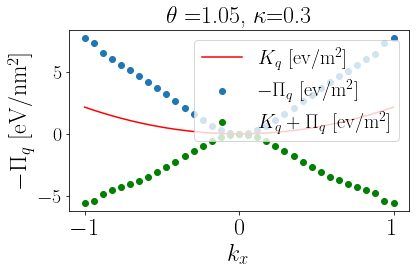

In [20]:
cTrans=13600

thetaarr=np.sort(np.array(df['theta'].unique()))
indthet=4

df_one_temp=df.loc[(df['nu'] == nu[indnumax])&(df['theta'] == thetaarr[indthet])&( (df['kx'] == 0.0))]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = data.loc[:,args[0]]
    d2 = gp2*data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    th = data.loc[:,args[3]]
    q0=2*np.sin(theta/2)*(4*np.pi/3)
    cons=mass*q0*q0/(a_graphene*a_graphene)
    plt.scatter(d1,d2/1e+18,label=r'$-\Pi_q$ [ev/m$^2$]')
    # plt.plot(d1, cons*d1*d1*d3*d3)
    plt.plot(d1, cons*(cTrans**2)*d1*d1/1e+18, c='r', label=r'$K_q$ [ev/m$^2$]')
    plt.scatter(d1,(cons*(cTrans**2)*d1*d1-d2)/1e+18,c='g',label=r'$K_q+\Pi_q$ [ev/m$^2$]')
    
    plt.legend(fontsize=20)
    plt.xticks(size=24)
    plt.yticks(size=20)
    
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)
    
    
    plt.xlabel(r'$k_x$', size=24)
    plt.ylabel(r'$-\Pi_q$  [eV/nm$^2$]', size=24)
    plt.title(r'$\theta=$'+str(np.round(thetaarr[indthet]*180/np.pi, 2)) +r', $\kappa$='+str(kappa), size=24)
    plt.tight_layout()
    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)
draw_heatmap( 'ky', 'bub', 'delt_cph','theta',data=df_one_temp)
plt.savefig('imgs/stiffness_03.png', dpi=400)
